# Weather Plot

The resulting plot depicts record high and low daily temperatures from 2005-2015 in Ann Arbor, Michigan.

The dataset used to create this plot was stored beforehand in the file `weather_data.csv`. It includes daily temperature records from multiple sites near Ann Arbor, Michigan, United States.

The dataset used in this assignment comes from a subset of the National Centers for Environmental Information [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe. 

Each row in the assignment datafile corresponds to a single observation. The following variables are included:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format
* **element** : indicator of element type
    * TMAX : maximum temperature (tenths of degrees C)
    * TMIN : minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

This plot was produced for an assignment in the [Applied Plotting, Charting & Data Representation in Python](https://www.coursera.org/learn/python-plotting) class from University of Michigan with Coursera.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# function determines record daily temperatures across multiple weather stations

# input:
# file_name: csv with ID, Date, Element and Data_Value columns (string)
# tmax_tin: 'TMIN' for low or 'TMAX' for high temperatures (string)
# ten_years: True to calculate record temperatures in 2005-2014, False for 2015 (boolean)

# output:
# daily_records: series of temperatures with Month_Day index
# Month_Day: month and day of date, e.g. '02-14' for February 14th (string)
# Temperature: record temperature in degrees Celsius (float)

# note that output excludes leap day, February 29th

def find_daily_records(file_name, tmax_tmin, ten_years):
    # laod file
    df = pd.read_csv(file_name)
    # filter dataset to only minimum or maximum temperatures
    df = df.loc[df['Element'] == tmax_tmin]
    # convert temperature from tenths of degrees to degrees 
    df['Temperature'] = df['Data_Value']/10
    # slice year from Date column and save in Year column
    df['Year'] = df['Date'].apply(lambda x: x[0:4])
    # slice month and day from Date column and save in Month_Day column
    df['Month_Day'] = df['Date'].apply(lambda x: x[5:10])
    # drop ID, Element, Data_Value, and Date columns
    df.drop(['ID', 'Element', 'Data_Value', 'Date'], axis=1, inplace=True)
    # filter data by year
    if ten_years:
        # exclude 2015 data if ten_years is True
        df = df.loc[df['Year'] != '2015']
    else:
        # only include 2015 data if ten_years is False
        df = df.loc[df['Year'] == '2015']
    # group by Month_Day and find extreme temperature
    if (tmax_tmin == 'TMIN'):
        daily_records = df.groupby('Month_Day')['Temperature'].min()
    else: # (tmax_tmin == 'TMAX'):
        daily_records = df.groupby('Month_Day')['Temperature'].max()
    # if leap day February 29 is included, remove it
    if ('02-29' in daily_records.index):
        daily_records.drop(labels='02-29', inplace=True)
    # reutrn daily records
    return daily_records

In [3]:
# find daily minimum temperatures for 2005-2014
min_ten_year = find_daily_records(file_name = 'weather_data.csv', tmax_tmin = 'TMIN', ten_years = True)
# find daily maximum temperatures for 2005-2014
max_ten_year = find_daily_records(file_name = 'weather_data.csv', tmax_tmin = 'TMAX', ten_years = True)
# find daily minimum temperatures for 2015
min_2015 = find_daily_records(file_name = 'weather_data.csv', tmax_tmin = 'TMIN', ten_years = False)
# find daily maximum temperatures for 2015
max_2015 = find_daily_records(file_name = 'weather_data.csv', tmax_tmin = 'TMAX', ten_years = False)
# find record minimum temperatures in 2015
record_min_2015 = min_2015[min_2015 < min_ten_year]
# find record maximum temperatures in 2015
record_max_2015 = max_2015[max_2015 > max_ten_year]

In [4]:
# clean up dates for plotting
# convert indices for all records from 2004-2015 from month-day string to month-day in 2015
min_ten_year.index = pd.to_datetime(min_ten_year.index + '-2015')
max_ten_year.index = pd.to_datetime(max_ten_year.index + '-2015')
record_min_2015.index = pd.to_datetime(record_min_2015.index + '-2015')
record_max_2015.index = pd.to_datetime(record_max_2015.index + '-2015')

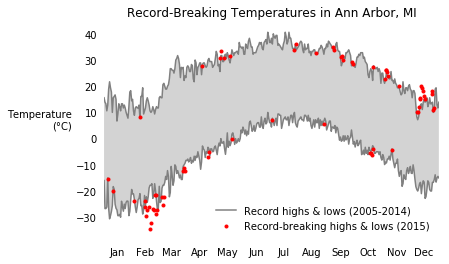

In [5]:
# create figure
fig, ax = plt.subplots()

# plot daily extremes from 2005-2014
ax.plot(min_ten_year, c='gray', label='Record highs & lows (2005-2014)')
ax.plot(max_ten_year, c='gray', label='_nolegend_')

# fill between daily extremes from 2005-2014
ax.fill_between(min_ten_year.index, min_ten_year.values, max_ten_year.values, facecolor='lightgray')

# plot record-breaking temperatures from 2015
ax.scatter(record_min_2015.index, record_min_2015.values, c='r', marker='.', label='Record-breaking highs & lows (2015)', zorder=3)
ax.scatter(record_max_2015.index, record_max_2015.values, c='r', marker='.', label='_nolegend_', zorder=3)

# add legend
ax.legend(loc='lower right', frameon=False)

# format month labels on x-axis
date_form = mdates.DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=15, interval=1))

# set plot title and x-axis limit
ax.set(title="Record-Breaking Temperatures in Ann Arbor, MI",
       xlim=["2015-01-01", "2015-12-31"])

# set y-axis label
ax.set_ylabel("Temperature\n(°C)", rotation='horizontal', ha='right')

# remove plot border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# remove tick marks
plt.tick_params(top='off', bottom='off', left='off', right='off')

# show figure
plt.show()

# save figure
fig.savefig('Assignment2.png', edgecolor='none', bbox_inches='tight')

You can now see seasonal trends in the temperatures in Ann Arbor, MI. The highest temperatures are in the summer, June to August. The lowest temperatures are in winter, December to February. The most daily temperature records were broken during an unusually cool February and an unusually warm early-December. 